In [50]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [51]:
# Define the path to the image dataset directory
data_dir = 'C:\\Phonee\\ML_Project\\DataSet\\CLEANED DATA'

# Function to resize images and extract HOG features
def resize_normalize_flatten_extract_hog(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (150, 150))  # Resize the image to desired dimensions
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    normalized_image = gray_image / 255.0  # Normalize pixel values to range [0, 1]
    hog_features = hog(normalized_image, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
    return hog_features



# Extract HOG features and preprocess images
feature_vectors = []
labels = []

# Loop for image preprocessing and feature extraction
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    for file in os.listdir(folder_path):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, file)
            hog_features = resize_normalize_flatten_extract_hog(image_path)
            feature_vectors.append(hog_features)
            labels.append(folder)  # Assuming folder name is the label

# Convert the feature vectors and labels to numpy arrays
X = np.array(feature_vectors)
y = np.array(labels)

In [52]:
from sklearn.model_selection import train_test_split

# Assuming you have your feature vectors X and labels y

# Split into training (60%) and rest (40%)
X_train, X_rest, y_train, y_rest = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split rest into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Now, X_train, X_val, X_test are your training, validation, and test sets respectively
# y_train, y_val, y_test are their corresponding labels


In [53]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Initialize and train the logistic regression model
# Increase max_iter and specify solver (e.g., 'lbfgs', 'sag', 'saga', 'liblinear', etc.)
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Logistic Regression Model Accuracy: {accuracy_logistic}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logistic)

Logistic Regression Model Accuracy: 0.7592920353982301
Logistic Regression Confusion Matrix:
[[388  94  32]
 [ 89 274  10]
 [ 36  11 196]]


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming X_scaled and y are your standardized feature vectors and labels

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5  # You can change this number based on your requirement

# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_scaled, y, cv=num_folds)

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score}")


C:\Users\mohamed medhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohamed medhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Cross-Validation Scores: [0.75763612 0.76095618 0.68459495 0.65537849 0.72377158]
Mean Cross-Validation Score: 0.7164674634794157
Standard Deviation of Cross-Validation Scores: 0.04117080061257506


C:\Users\mohamed medhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_train)
X_kmeans = kmeans_model.predict(X_test)

# Assuming 'y_test' contains the true labels
# Encode the true labels for comparison
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate accuracy and confusion matrix for K-Means
accuracy_kmeans = accuracy_score(y_test_encoded, X_kmeans)
conf_matrix_kmeans = confusion_matrix(y_test_encoded, X_kmeans)

print(f"K-Means Model Accuracy: {accuracy_kmeans}")
print("K-Means Confusion Matrix:")
print(conf_matrix_kmeans)


C:\Users\mohamed medhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Model Accuracy: 0.2407079646017699
K-Means Confusion Matrix:
[[138 257 119]
 [166  60 147]
 [ 81  88  74]]


C:\Users\mohamed medhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


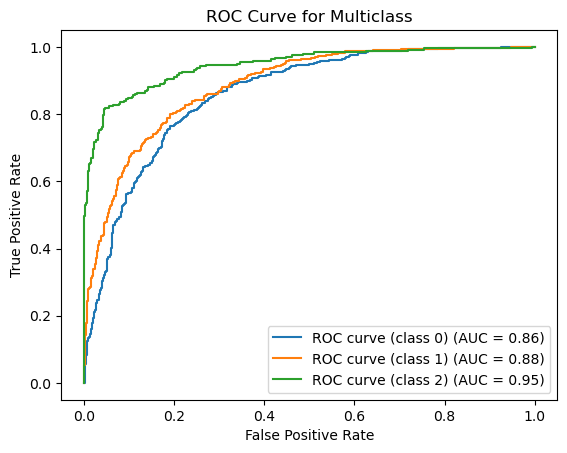

In [57]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Train the model (logistic regression or any classifier)
# Assuming clf is your trained classifier
clf = LogisticRegression()  # Example, replace with your classifier

# Fit the classifier
clf.fit(X_train, y_train)

# Get the probabilities for each class
y_probs = clf.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend()
plt.show()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

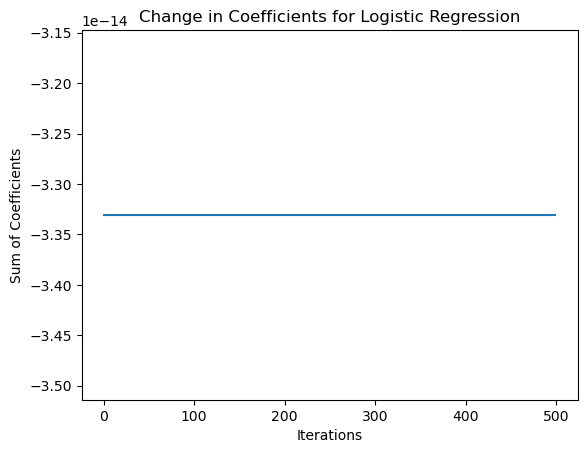

In [61]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset for example
X, y = load_iris(return_X_y=True)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='auto', verbose=1)

# Train the model
weights = []
for i in range(1, 500):
    logistic_model.fit(X, y)
    weights.append(np.sum(logistic_model.coef_))  # Summing coefficients for simplicity

# Plotting the change in coefficients across iterations
plt.plot(range(1, 500), weights)
plt.xlabel('Iterations')
plt.ylabel('Sum of Coefficients')
plt.title('Change in Coefficients for Logistic Regression')
plt.show()
